**<h1 style = 'text-align: center'>Multiple Inputs Graph</h1>**

## 1. Objectives

1. Define a more complex AgenState
2. Create a processing node that performs operations on list data
3. Set up a LangGraph that processes and outputs computef results
4. Invoke the graph with structured inputs and retrive outputs

-> **Main goal**: Learn how to handle multiple inputs

In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [3]:
# define AgentState
class AgentState(TypedDict):
    values: List[int]
    name: str
    result: str

In [7]:
# define action of nodes

def process_values(state: AgentState) -> AgentState:
    """ Sum the values and concate with the name to return the string result"""

    state['result'] = f"Hi there {state['name']}! Your sum = {sum(state['values'])}"
    return state

In [8]:
# build graph

graph = StateGraph(AgentState)

graph.add_node("processor", process_values)

graph.set_entry_point("processor")
graph.set_finish_point("processor")

app = graph.compile()

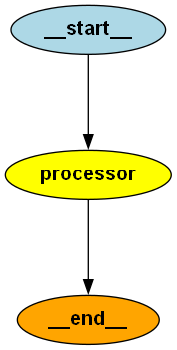

In [9]:
# visualize workflow
from IPython.display import Image, display

display(Image(app.get_graph().draw_png()))


In [12]:
# invoke app

answer = app.invoke(
    {"values" : [1, 2, 3, 4],
    "name": "Kim"}
)

answer

{'values': [1, 2, 3, 4],
 'name': 'Kim',
 'result': 'Hi there Kim! Your sum = 10'}

# 2. Exercise for Graph II

Create a graph -> pass a single list of int , name, an operation  
- if operation = `+` -> add elements 
- if operation = `*+*` -> multiply elements

- input: {"name": "Jack Sparrow", "values": [1,2,3,4], "operation": "*"}
- output: "Hi Jack Sparrow, your answer is: 24"

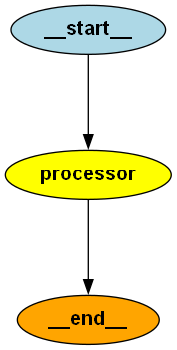

In [14]:
from typing import List, TypedDict
from langgraph.graph import StateGraph

# define state of agent
class AgentState(TypedDict):
    values: List[int]
    operation: str
    name: str
    result: str

# define action
def process_list(state: AgentState) -> AgentState:
    """process values in list with the corresponding operation"""

    if state['operation'] == "*":
        multiply_result = 1
        for i in state['values']:
            multiply_result *= i 
        state['result'] = f"Hi {state['name']}, your anwser is: {multiply_result}"

    elif state['operation'] == "+":
        state['result'] = f"Hi {state['name']}, your anwser is: {sum(state['values'])}"
    else: 
        return None    
    return state

# build graph
graph = StateGraph(AgentState)

graph.add_node('processor', process_list)

graph.set_entry_point('processor')
graph.set_finish_point('processor')

app = graph.compile()

# visualize graph
from IPython.display import Image, display

display(Image(app.get_graph().draw_png()))



In [17]:
# invoke graph

answer = app.invoke({
    'values': [1, 2, 3, 4],
    'operation': '*',
    'name': 'Jack Sparrow'
})

answer

{'values': [1, 2, 3, 4],
 'operation': '*',
 'name': 'Jack Sparrow',
 'result': 'Hi Jack Sparrow, your anwser is: 24'}